## Walmart Customer Review Data Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [4]:
df = pd.read_csv('/data/customer_reviews.csv') #Read in Data into data frame
print(df.shape) # print number of rows and columns

(423, 9)


In [5]:
df.head() # display first 5 rows by default

,id,name,rating,verified,date,title,body,like,dislike
0,1,Kevin,5,True,26/06/2024,Love,I bought this for my fiancé as a surprise beca...,0,0
1,2,Jasmine,5,True,09/07/2024,Stanley 40oz in Shale,LOVEEEE THIS CUP ARRIVED SO FAST AND ITS PERFECT,0,0
2,3,HannahC,3,False,26/11/2023,Disappointed,"Work from home, so this is a pampered cup. Unf...",0,0
3,4,ValC,1,True,06/02/2024,Fake Stanley,This is not a real Stanley. The straw is not a...,0,0
4,5,JasonP,1,False,29/12/2023,New but Chipping Already,I recently purchased the 40oz Soft Matte in Or...,0,0


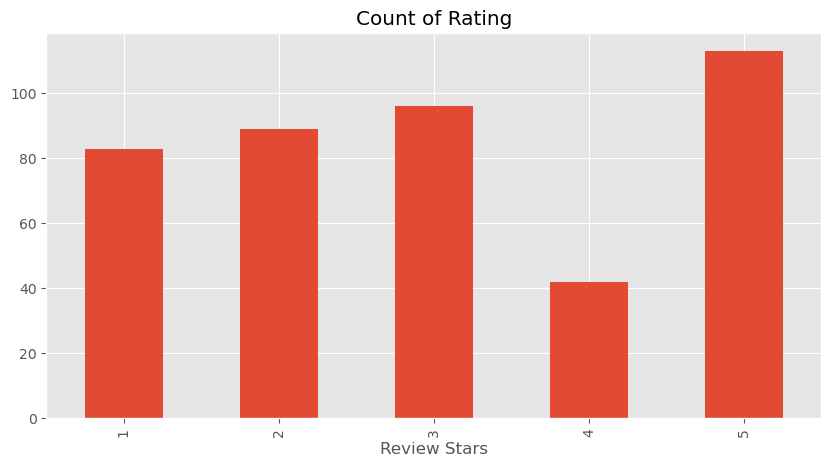

In [6]:
ax = df['rating'].value_counts().sort_index()\
    .plot(kind='bar',title='Count of Rating',figsize=(10,5)) # count each rating and sorted by rating
ax.set_xlabel('Review Stars')

plt.savefig('chart1.png') # to export the chart as a png file

plt.show()

In [7]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

# polarity scores is between -1 and +1.

In [8]:
example = df['body'].values[0]
print(example)

I bought this for my fiancé as a surprise because she always complained that her previous cup never held ice or kept her water cold. She loves the Stanley! It keeps her ice frozen for 12  hours and she doesn't leave home without it. We honestly didn't understand the “Stanley” rave but now here I am getting myself one too. Would definitely recommend.


In [9]:
# Run for Vader Model
sia.polarity_scores(example)

{'neg': 0.052, 'neu': 0.772, 'pos': 0.176, 'compound': 0.8164}

In [10]:
res = {}
for i, row in tqdm(df.iterrows(),total=len(df)):
    try:
        text = row['body']
        myid = row['id']
        
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f'vader_{key}'] = value
            
        res[myid] = vader_result_rename
    except RuntimeError:
        print(f'Broke for id {myid}')


  0%|          | 0/423 [00:00<?, ?it/s]

In [11]:
pd.DataFrame(res).T

,vader_neg,vader_neu,vader_pos,vader_compound
1,0.052,0.772,0.176,0.8164
2,0.000,0.684,0.316,0.5719
3,0.109,0.801,0.090,-0.3227
4,0.047,0.915,0.038,-0.1396
5,0.072,0.863,0.065,-0.2206
...,...,...,...,...
419,0.000,0.818,0.182,0.4404
420,0.275,0.559,0.166,-0.3682
421,0.000,0.517,0.483,0.8553
422,0.000,1.000,0.000,0.0000


In [12]:
df

,id,name,rating,verified,date,title,body,like,dislike
0,1,Kevin,5,True,26/06/2024,Love,I bought this for my fiancé as a surprise beca...,0,0
1,2,Jasmine,5,True,09/07/2024,Stanley 40oz in Shale,LOVEEEE THIS CUP ARRIVED SO FAST AND ITS PERFECT,0,0
2,3,HannahC,3,False,26/11/2023,Disappointed,"Work from home, so this is a pampered cup. Unf...",0,0
3,4,ValC,1,True,06/02/2024,Fake Stanley,This is not a real Stanley. The straw is not a...,0,0
4,5,JasonP,1,False,29/12/2023,New but Chipping Already,I recently purchased the 40oz Soft Matte in Or...,0,0
...,...,...,...,...,...,...,...,...,...
418,419,NicoleK,1,False,09/07/2023,Didn't last long,Says it's dishwasher safe. The bottom is alrea...,0,0
419,420,KerianneM,2,False,30/05/2023,dont buy the matte,The matte is so cute until it isn't. Peeling o...,0,0
420,421,ChristineA,5,False,08/02/2023,Soft touch,"I have Bay Leaf, it beautiful and love the fee...",0,0
421,422,TriciaT,2,False,19/05/2023,Soft Matte Finish Not Durable,The finish is not durable. After only using fo...,0,0


In [13]:
result_df = pd.DataFrame(res).T
result_df = result_df.reset_index().rename(columns={'index':'id'}) # add id column into vader list
result_df =result_df.merge(df, how='left') # merge two tables

In [14]:
result_df.head(5)

,id,vader_neg,vader_neu,vader_pos,vader_compound,name,rating,verified,date,title,body,like,dislike
0,1,0.052,0.772,0.176,0.8164,Kevin,5,True,26/06/2024,Love,I bought this for my fiancé as a surprise beca...,0,0
1,2,0.000,0.684,0.316,0.5719,Jasmine,5,True,09/07/2024,Stanley 40oz in Shale,LOVEEEE THIS CUP ARRIVED SO FAST AND ITS PERFECT,0,0
2,3,0.109,0.801,0.090,-0.3227,HannahC,3,False,26/11/2023,Disappointed,"Work from home, so this is a pampered cup. Unf...",0,0
3,4,0.047,0.915,0.038,-0.1396,ValC,1,True,06/02/2024,Fake Stanley,This is not a real Stanley. The straw is not a...,0,0
4,5,0.072,0.863,0.065,-0.2206,JasonP,1,False,29/12/2023,New but Chipping Already,I recently purchased the 40oz Soft Matte in Or...,0,0


In [15]:
result_df.columns

Index(['id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound', 'name',
       'rating', 'verified', 'date', 'title', 'body', 'like', 'dislike'],
      dtype='object')

In [16]:
result_df.info() # info about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              423 non-null    int64  
 1   vader_neg       423 non-null    float64
 2   vader_neu       423 non-null    float64
 3   vader_pos       423 non-null    float64
 4   vader_compound  423 non-null    float64
 5   name            423 non-null    object 
 6   rating          423 non-null    int64  
 7   verified        423 non-null    bool   
 8   date            423 non-null    object 
 9   title           423 non-null    object 
 10  body            423 non-null    object 
 11  like            423 non-null    int64  
 12  dislike         423 non-null    int64  
dtypes: bool(1), float64(4), int64(4), object(4)
memory usage: 40.2+ KB


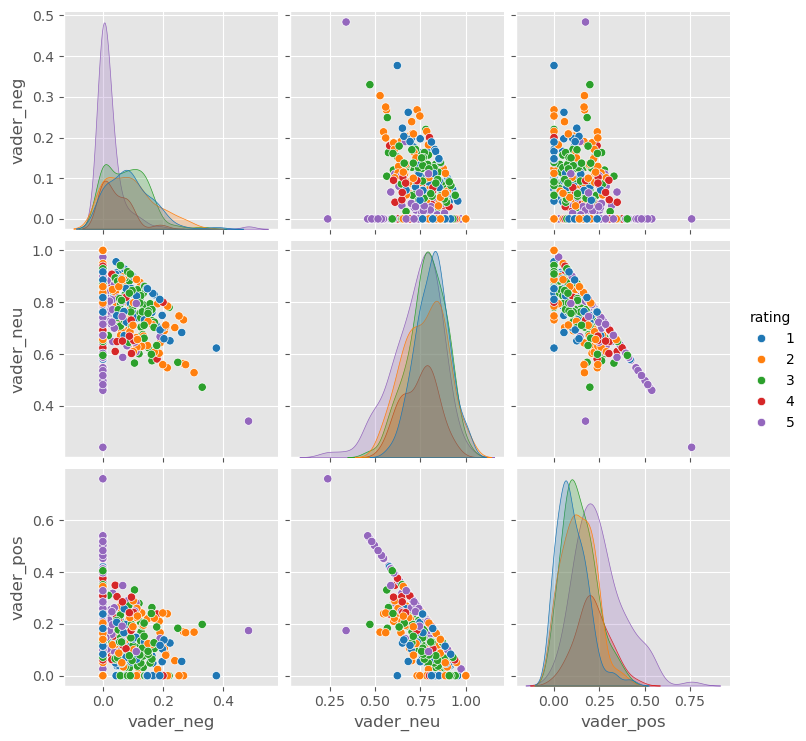

In [17]:
sns.pairplot(data = result_df,vars =['vader_neg', 'vader_neu', 'vader_pos'], 
             hue='rating', palette='tab10')

plt.savefig('chart2.png') # to export the chart as a png file

plt.show()


In [18]:
result_df.to_csv('/data/customer_reviews1.csv', index=False)
print('Data has been exported successfully...')

Data has been exported successfully...
